# Final Project
##### by Valeria Izeppi
##### 12/4/2023

## Outline

### Goal: To analyze the relationships between dissolved oxygen and nutrients, chl-a, and temperature over the study period. 

### Data: Accessed from Interstate Environmental Commission Long Island Sound Study, for the years 2016-2022, excluding 2018.

### Analysis: Visualize changes in dissolved oxygen, chl-a, and nutrients over time in plots, map the study area and the dissolved oxygen levels, perform linear regression between dissolved oxygen and other parameters, build a model to predict dissolved oxygen

### Method : Python libraries Pandas, Numpy, Matplotlib, Cartopy, Statsmodel, Patsy


In [147]:
# import packages

#for data processing and analysis
import pandas as pd
import numpy as np

#for making plots and graphs
import matplotlib.pyplot as plt
from matplotlib.axis import Axis

#for making maps
import cartopy as car
import cartopy.crs as ccrs
import cartopy.feature as cfeature

#for linear regression and building model
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf
#to install statsmodel, may use mamba or conda (mamba very fast!)
#mamba install -c conda-forge statsmodels


### Read in and Format Data

In [264]:
# read in the raw data csvs
# ND in the dataset means No Data. Replace ND and nans with NaN instead
df_16 = pd.read_csv('/home/vgi3/rcaes/Final_Project/LIS 2016 DB.csv', parse_dates = ['DATE'], index_col=0, na_values=['ND','nan'])
df_17 = pd.read_csv('/home/vgi3/rcaes/Final_Project/LIS 2017 DB.csv', parse_dates = ['DATE'], index_col=0, na_values=['ND','nan'])
df_19 = pd.read_csv('/home/vgi3/rcaes/Final_Project/LIS 2019 DB draft.csv', parse_dates = ['DATE'], index_col=0, na_values=['ND','nan'])
dF_20 = pd.read_csv('/home/vgi3/rcaes/Final_Project/LIS 2020 DB.csv', parse_dates = ['DATE'], index_col=0, na_values=['ND','nan'])
df_21 = pd.read_csv('/home/vgi3/rcaes/Final_Project/LIS 2021 DB.csv', parse_dates = ['DATE'], index_col=0, na_values=['ND','nan'])
df_22 = pd.read_csv('/home/vgi3/rcaes/Final_Project/LISS RUNS 2022_DB.csv', parse_dates = ['DATE'], index_col=0, na_values=['ND','nan'])

In [265]:
#combine the dataframes to make ones dataframe
df = pd.concat([df_16, df_17, df_19, dF_20, df_21, df_22])

In [266]:
#view dataframe columns and examine the datatypes. Consists of object, datetime64[ns], float64
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7335 entries, 18916.0 to 26498.0
Data columns (total 77 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RECORD_ID                6614 non-null   object        
 1   DATE_STATION_LINK        6614 non-null   object        
 2   DATE                     6614 non-null   datetime64[ns]
 3   YEAR                     6614 non-null   float64       
 4   MONTH                    6614 non-null   object        
 5   TIME_24H                 6610 non-null   object        
 6   STATION_ID               6614 non-null   object        
 7   DEPTH_M                  6587 non-null   float64       
 8   CLASS                    6612 non-null   object        
 9   DISSOLVED_OXYGEN_MG_L    6574 non-null   float64       
 10  TEMPERATURE_C            6573 non-null   float64       
 11  SALINITY_PSU             6572 non-null   float64       
 12  CHLA_UG_L                1350 

In [267]:
## Data Cleanup

In [268]:
#drop columns not used in analysis and excessive columns (unnamed)
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)
df = df.drop(['EDIT NOTES', 'FIELD_NOTES', 'SECCHI_DEPTH_M', 'SECCHI_DEPTH_F', 'LISS_STUDY_AREA', 'CLOUD_COVER', 'SAMPLING SURVEY RUN', 'TIDE_TIME_NR', 'TIDE_RANGE_FT_NR', 'BOD5_MG_L', 'TIDE_TYPE_NR', 'TIDE_TIME_KP', 'TIDE_RANGE_FT_KP', 'TIDE_RANGE_FT_KP', 'TIDE_TYPE_KP'], axis=1)

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7335 entries, 18916.0 to 26498.0
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   RECORD_ID                6614 non-null   object        
 1   DATE_STATION_LINK        6614 non-null   object        
 2   DATE                     6614 non-null   datetime64[ns]
 3   YEAR                     6614 non-null   float64       
 4   MONTH                    6614 non-null   object        
 5   TIME_24H                 6610 non-null   object        
 6   STATION_ID               6614 non-null   object        
 7   DEPTH_M                  6587 non-null   float64       
 8   CLASS                    6612 non-null   object        
 9   DISSOLVED_OXYGEN_MG_L    6574 non-null   float64       
 10  TEMPERATURE_C            6573 non-null   float64       
 11  SALINITY_PSU             6572 non-null   float64       
 12  CHLA_UG_L                1350 

In [ ]:
df.loc[df['A'] == '<0.05','A'] = 0

In [239]:
df['AMMONIA-AMMONIUM_MG_L'].unique()

array([nan, '<0.05', '0.0949', '0.147', '0.0747', '0.0720', '0.135',
       '0.0762', '0.0702', '0.175', '0.188', '0.158', '0.267', '0.129',
       '0.0645', '0.0869', '0.156', '0.0952', '0.0544', '0.185', '0.0972',
       '0.0560', '0.163', '0.0735', '0.0612', '0.0846', '0.126', '0.189',
       '0.209', '0.0868', '0.0793', '<0.10', '0.138', '0.143', '0.108',
       '0.195', '0.161', '0.149', '0.292', '0.130', '0.574', '0.115',
       '0.169', '0.614', '0.344', '0.426', '0.342', '0.190', '0.251',
       '0.431', '0.277', '0.202', '0.220', '0.139', '0.104', '0.316',
       '<0.023', '0.0841', '0.132', '0.0449', '0.0483', '0.0402', '0.306',
       '0.134', '0.119', '0.041', '0.05', '0.113', '0.013', '0.018',
       '0.03', '0.065', '0.173', '0.151', '0.088', '0.097', '0.06',
       '0.079', '0.086', '0.071', '0.121', '0.073', '0.016', '0.076',
       '0.114', '0.069', '0.067', '0.032', '0.014', '0.034', '0.023',
       '0.094', '0.102', '0.159', '0.243', '0.057', '0.048', '0.039',
      

In [ ]:
df.loc[df.]

In [208]:
def convert_object_to_numeric(dataframe, column):
    column_data = dataframe[column]
    dataframe[results] = pd.to_numeric(column_data,  errors = 'coerce')
    return dataframe[column] <= dataframe[results]

In [211]:
df.columns

Index(['STATION_ID', 'RECORD_ID', 'DATE_STATION_LINK', 'YEAR', 'MONTH',
       'TIME_24H', 'DEPTH_M', 'CLASS', 'DO', 'TEMPERATURE_C', 'SALINITY_PSU',
       'CHLA_UG_L', 'PH', 'BOD5_MG_L', 'TSS_MG_L', 'AMMONIA-AMMONIUM_MG_L',
       'NITRITE_NITRATE_MG_L', 'PARTICULATE_N_MG_L', 'ORTHOPHOSPHATE_MG_L',
       'TOTAL_DISSOLVED_ N_MG_L', 'TOTAL_DISSOLVED_P_MG_L',
       'PARTICULATE_P_MG_L', 'DOC_MG_L', 'PARTICULATE_C_MG_L',
       'DISSOLVED_SILICA_MG_L', 'BIOGENIC_SILICA_MG_L', 'INVESTIGATION',
       'STATION_ID_B', 'SEA_STATE', 'WEATHER', 'PREV_24_H_RAIN',
       'PREV_48_H_RAIN', 'TIDE_TIME_NR', 'TIDE_RANGE_FT_NR', 'TIDE_TYPE_NR',
       'TIDE_TIME_KP', 'TIDE_RANGE_FT_KP', 'TIDE_TYPE_KP', 'LAT_DD',
       'LONG_DD'],
      dtype='object')

In [ ]:
column_list = []
for icolumn in df.columns:
    df[icolumn] = df
    pd.to_numeric(column_data,  errors = 'coerce')

In [210]:
convert_to_numeric(df,'PH')

TypeError: 'function' object is not subscriptable

In [213]:
### Convert Object Columns to Numeric so they can be used for analysis
df['PH'] = pd.to_numeric(df['PH'], errors = 'coerce')
df['BOD5_MG_L'] = pd.to_numeric(df['BOD5_MG_L'], errors = 'coerce')
df['TSS_MG_L'] = pd.to_numeric(df['TSS_MG_L'], errors = 'coerce')
df['PREV_48_H_RAIN'] = pd.to_numeric(df['PREV_48_H_RAIN'], errors = 'coerce')
df['AMMONIA-AMMONIUM_MG_L'] = pd.to_numeric(df['AMMONIA-AMMONIUM_MG_L'], errors = 'coerce')
df['NITRITE_NITRATE_MG_L'] = pd.to_numeric(df['NITRITE_NITRATE_MG_L'], errors = 'coerce')
df['PARTICULATE_N_MG_L'] = pd.to_numeric(df['PARTICULATE_N_MG_L'], errors = 'coerce')
df['ORTHOPHOSPHATE_MG_L'] = pd.to_numeric(df['ORTHOPHOSPHATE_MG_L'], errors = 'coerce')
df['TOTAL_DISSOLVED_ N_MG_L'] = pd.to_numeric(df['TOTAL_DISSOLVED_ N_MG_L'], errors = 'coerce')
df['TOTAL_DISSOLVED_P_MG_L'] = pd.to_numeric(df['TOTAL_DISSOLVED_P_MG_L'], errors = 'coerce')
df['PARTICULATE_P_MG_L'] = pd.to_numeric(df['PARTICULATE_P_MG_L'], errors = 'coerce')
df['DISSOLVED_SILICA_MG_L'] = pd.to_numeric(df['DISSOLVED_SILICA_MG_L'], errors = 'coerce')
df['BIOGENIC_SILICA_MG_L'] = pd.to_numeric(df['BIOGENIC_SILICA_MG_L'], errors = 'coerce')


In [214]:
#read in the location file which containts the station ID latitudes and longitudes
location = pd.read_csv('/home/vgi3/rcaes/Final_Project/ArcGIS Data 2022.xlsx .csv')

In [215]:
#open file
location

,STATION_ID,LAT_DD,LONG_DD
0,8-403,40.77791,-73.76083
1,8-405,40.78889,-73.75806
2,9-409,40.82423,-73.71767
3,9-412,40.82009,-73.71357
4,9-413,40.80436,-73.71353
5,A1,40.80110,-73.82747
6,A2M,40.79926,-73.79131
7,A3,40.84348,-73.75935
8,A4,40.87259,-73.73428
9,A5,40.89229,-73.68531


In [216]:
# To add the lat and long to the stations, first reindex both dataframes to STATION_ID
location = location.set_index('STATION_ID')
df = df.set_index('STATION_ID')

In [217]:
# add longitude and latitude from location dataframe to df dataframe as new columns, according to station id index
df['LAT_DD'] =location['LAT_DD']
df['LONG_DD'] = location['LONG_DD']

In [218]:
#check
df

,RECORD_ID,DATE_STATION_LINK,YEAR,MONTH,TIME_24H,DEPTH_M,CLASS,DO,TEMPERATURE_C,SALINITY_PSU,...,PREV_24_H_RAIN,PREV_48_H_RAIN,TIDE_TIME_NR,TIDE_RANGE_FT_NR,TIDE_TYPE_NR,TIDE_TIME_KP,TIDE_RANGE_FT_KP,TIDE_TYPE_KP,LAT_DD,LONG_DD
STATION_ID,,,,,,,,,,,,,,,,,,,,,
A2M,A2M_7/5/2016_08:36_1.0,7/5/2016_A2M,2016.0,7,8:36,1.0,Surface,5.07,19.360,27.21,...,1.08,1.08,7:03,-0.93,Low,7:21,-1.0,Low,40.79926,-73.79131
E12,E12_7/5/2016_08:58_1.0,7/5/2016_E12,2016.0,7,8:58,1.0,Surface,5.76,20.300,27.35,...,1.08,1.08,7:03,-0.93,Low,7:21,-1.0,Low,NaN,NaN
H-A3,H-A3_7/5/2016_09:35_1.0,7/5/2016_H-A3,2016.0,7,9:35,1.0,Surface,6.80,19.420,28.12,...,1.08,1.08,7:03,-0.93,Low,7:21,-1.0,Low,40.92084,-73.71825
B1S,B1S_7/5/2016_09:54_1.0,7/5/2016_B1S,2016.0,7,9:54,1.0,Surface,7.34,19.190,28.08,...,1.08,1.08,7:03,-0.93,Low,7:21,-1.0,Low,40.94037,-73.66656
B3M,B3M_7/5/2016_10:08_1.0,7/5/2016_B3M,2016.0,7,10:08,1.0,Surface,7.99,19.630,27.92,...,1.08,1.08,7:03,-0.93,Low,7:21,-1.0,Low,40.91890,-73.64013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B3M,B3M_12/20/2022_12:38_0.5,12/20/2022_B3M,2022.0,December,12:38,0.5,Surface,10.47,5.984,28.11,...,1 ft,NaN,"Clear skies, windy, 33°F air temp, 15 mph wind",0,0,7:34,8.07,High,40.91890,-73.64013
H-D,H-D_12/20/2022_13:16_0.5,12/20/2022_H-D,2022.0,December,13:16,0.5,Surface,11.06,4.457,26.12,...,Ripples,NaN,"Clear skies, windy, 33°F air temp, 15 mph wind",0,0,7:34,8.07,High,40.84037,-73.65731
A5,A5_12/20/2022_12:54_0.5,12/20/2022_A5,2022.0,December,12:54,0.5,Surface,10.34,6.186,28.16,...,1 ft,NaN,"Clear skies, windy, 33°F air temp, 15 mph wind",0,0,7:34,8.07,High,40.89229,-73.68531


In [219]:
#now change index to time
df = df.reset_index()

In [220]:
df = df.set_index('DATE')

KeyError: "None of ['DATE'] are in the columns"

In [221]:
#check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538 entries, 0 to 537
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATION_ID               538 non-null    object 
 1   RECORD_ID                538 non-null    object 
 2   DATE_STATION_LINK        538 non-null    object 
 3   YEAR                     538 non-null    float64
 4   MONTH                    538 non-null    object 
 5   TIME_24H                 538 non-null    object 
 6   DEPTH_M                  538 non-null    float64
 7   CLASS                    538 non-null    object 
 8   DO                       538 non-null    float64
 9   TEMPERATURE_C            538 non-null    float64
 10  SALINITY_PSU             538 non-null    float64
 11  CHLA_UG_L                538 non-null    float64
 12  PH                       538 non-null    float64
 13  BOD5_MG_L                249 non-null    float64
 14  TSS_MG_L                 4

In [222]:
#rename columns for easier use
df= df.rename(columns={'DISSOLVED_OXYGEN_MG_L':'DO'})

## Seperating dataframes into sub_dataframes

### Nutrient Subset Dataframe

In [223]:
## the nutrient data is only taken once per month while most other paramaters measured weekly. will seperate the rows with nutrient data into seperate dataframe

In [224]:
df_NUTR = df
df_NUTR = df.dropna(subset = ['AMMONIA-AMMONIUM_MG_L', 'NITRITE_NITRATE_MG_L', 'PARTICULATE_N_MG_L', 'ORTHOPHOSPHATE_MG_L', 'TOTAL_DISSOLVED_ N_MG_L', 'TOTAL_DISSOLVED_P_MG_L', 'PARTICULATE_P_MG_L', 'DISSOLVED_SILICA_MG_L', 'BIOGENIC_SILICA_MG_L'])

In [225]:
df_NUTR.info()

<class 'pandas.core.frame.DataFrame'>
Index: 225 entries, 208 to 537
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   STATION_ID               225 non-null    object 
 1   RECORD_ID                225 non-null    object 
 2   DATE_STATION_LINK        225 non-null    object 
 3   YEAR                     225 non-null    float64
 4   MONTH                    225 non-null    object 
 5   TIME_24H                 225 non-null    object 
 6   DEPTH_M                  225 non-null    float64
 7   CLASS                    225 non-null    object 
 8   DO                       225 non-null    float64
 9   TEMPERATURE_C            225 non-null    float64
 10  SALINITY_PSU             225 non-null    float64
 11  CHLA_UG_L                225 non-null    float64
 12  PH                       225 non-null    float64
 13  BOD5_MG_L                118 non-null    float64
 14  TSS_MG_L                 144 

In [226]:
#now have two dataframes: df = complete dataset, df_NUTR = subset of dataset where nutrient data is true for that sampling event

## Dealing with Outliers

### Identify Outliers

In [228]:
# to get a glance at potential outliers, compared the max to the mean of each variable column using describe()
df.describe()

,YEAR,DEPTH_M,DO,TEMPERATURE_C,SALINITY_PSU,CHLA_UG_L,PH,BOD5_MG_L,TSS_MG_L,AMMONIA-AMMONIUM_MG_L,...,ORTHOPHOSPHATE_MG_L,TOTAL_DISSOLVED_ N_MG_L,TOTAL_DISSOLVED_P_MG_L,PARTICULATE_P_MG_L,DOC_MG_L,DISSOLVED_SILICA_MG_L,BIOGENIC_SILICA_MG_L,PREV_48_H_RAIN,LAT_DD,LONG_DD
count,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,538.000000,249.000000,434.000000,413.000000,...,538.000000,520.000000,419.000000,340.000000,536.000000,517.000000,536.000000,503.000000,503.000000,503.000000
mean,2019.949814,0.603634,7.555204,17.584478,26.467454,15.851388,6.370948,5.706996,12.523491,2.408158,...,0.103690,0.318097,0.218314,0.080665,1.620486,1.848235,0.976475,0.203738,40.866956,-73.720750
std,1.992371,0.331274,2.568173,7.341569,1.490383,19.551616,2.534413,2.017232,10.163089,4.458100,...,0.072173,0.212947,0.214428,0.106372,1.017239,1.239312,1.171979,0.378274,0.049682,0.052908
min,2016.000000,0.300000,2.840000,1.289000,22.090000,0.540000,0.000000,3.010000,0.640000,0.009000,...,0.002000,0.014100,0.017800,-0.035600,0.004100,0.049700,0.029400,0.000000,40.777910,-73.804280
25%,2019.000000,0.500000,5.680000,13.390000,25.582500,5.042750,7.055000,3.570000,4.715000,0.027000,...,0.051825,0.173925,0.098200,0.021900,1.362500,0.787000,0.290000,0.000000,40.820090,-73.764050
50%,2021.000000,0.500000,7.175000,21.447000,26.475000,9.670000,7.540000,5.460000,10.270000,0.104000,...,0.090700,0.280000,0.136200,0.042200,1.900000,1.780000,0.505500,0.030000,40.872590,-73.718250
75%,2022.000000,0.600000,9.722500,22.907500,27.360000,17.767500,7.860000,7.680000,17.095000,4.300000,...,0.138700,0.432500,0.256050,0.122575,2.162500,2.730000,0.909750,0.220000,40.918900,-73.666560
max,2022.000000,7.000000,15.730000,26.800000,30.250000,138.180000,8.500000,11.900000,98.300000,37.980000,...,0.390000,2.330000,1.540000,1.432000,9.120000,6.060000,6.350000,1.760000,40.940370,-73.640130


In [ ]:
# the DO max is unusually high. Will 

In [175]:
df_NUTR.describe()

,YEAR,DEPTH_M,DO,TEMPERATURE_C,SALINITY_PSU,CHLA_UG_L,PH,BOD5_MG_L,TSS_MG_L,AMMONIA-AMMONIUM_MG_L,...,ORTHOPHOSPHATE_MG_L,TOTAL_DISSOLVED_ N_MG_L,TOTAL_DISSOLVED_P_MG_L,PARTICULATE_P_MG_L,DOC_MG_L,DISSOLVED_SILICA_MG_L,BIOGENIC_SILICA_MG_L,PREV_48_H_RAIN,LAT_DD,LONG_DD
count,266.000000,266.000000,265.000000,265.000000,265.000000,264.000000,233.000000,126.000000,181.000000,266.000000,...,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,230.000000,253.000000,253.000000
mean,2021.109023,0.564662,7.384415,16.793755,26.533321,9.210754,5.337768,6.921111,10.034696,3.444380,...,0.119632,0.319479,0.235532,0.075226,1.343655,1.491211,1.349082,0.124565,40.857966,-73.727795
std,0.832904,0.427224,2.532551,7.308000,1.269496,8.493613,2.899019,1.651013,8.605793,5.776173,...,0.083731,0.254466,0.174234,0.076696,1.133874,0.938122,1.614260,0.245150,0.049260,0.054334
min,2020.000000,0.400000,3.040000,1.612000,22.040000,0.126000,0.230000,3.030000,0.640000,0.009000,...,0.011300,0.031700,0.037200,-0.114200,0.004100,0.076800,0.030000,0.000000,40.777910,-73.804280
25%,2020.000000,0.500000,5.360000,9.970000,25.840000,3.555000,1.960000,7.262500,4.150000,0.021000,...,0.069625,0.110775,0.111250,0.019600,0.022325,0.597500,0.210000,0.000000,40.820090,-73.764050
50%,2021.000000,0.500000,7.220000,21.357000,26.600000,7.197500,7.240000,7.585000,7.700000,0.077000,...,0.096200,0.270000,0.158800,0.045150,1.870000,1.560000,0.390000,0.030000,40.848560,-73.734280
75%,2022.000000,0.600000,9.450000,22.796000,27.360000,11.965000,7.690000,7.840000,13.600000,6.850000,...,0.142975,0.460000,0.350000,0.124675,2.120000,2.100000,2.640000,0.152500,40.893060,-73.666560
max,2022.000000,7.000000,14.580000,25.873000,29.450000,58.404000,11.850000,11.900000,48.190000,37.980000,...,0.511000,2.330000,0.760000,0.313700,9.120000,6.210000,6.400000,1.100000,40.940370,-73.640130


In [177]:
#another way to check what the max values are with nlargest
df['DO'].nlargest(10)

DATE
2017-07-18    913.00
2022-02-09     16.15
2022-02-09     16.04
2022-02-09     15.75
2022-02-09     15.73
2022-02-09     15.71
2022-02-09     15.55
2022-02-09     15.46
2022-02-09     15.39
2022-02-09     15.25
Name: DO, dtype: float64

In [178]:
#will remove outliers

In [179]:
#write a function to remove any values more that three standard deviations away.
#assumptions are normal distribution of data
def remove_outliers(dataframe, column):
    column_data = dataframe[column]
    return dataframe[column] <= dataframe[np.abs(column_data-column_data.mean()) <= (3*column_data.std())]

In [180]:
#will apply to variables using for analysis

remove_outliers(df, 'DO')
remove_outliers(df, 'PH')
remove_outliers(df, 'CHLA_UG_L')
remove_outliers(df, 'SALINITY_PSU')
remove_outliers(df, 'ORTHOPHOSPHATE_MG_L')
remove_outliers(df, 'TEMPERATURE_C')
remove_outliers(df_NUTR, 'DO')
remove_outliers(df_NUTR, 'PH')
remove_outliers(df_NUTR, 'CHLA_UG_L')
remove_outliers(df_NUTR, 'SALINITY_PSU')
remove_outliers(df_NUTR, 'ORTHOPHOSPHATE_MG_L')
remove_outliers(df_NUTR, 'TEMPERATURE_C')
remove_outliers(df_CHLA, 'DO')
remove_outliers(df_CHLA, 'CHLA_UG_L')

ValueError: Operands are not aligned. Do `left, right = left.align(right, axis=1, copy=False)` before operating.

In [181]:
#make a copy of dataframe, so can still access the original dataframe
df_copy_of_original= df.copy()

In [182]:
#remove any values more that three standard deviations away in the original dataframes
#assumptions are normal distribution of data
df= df[np.abs(df.DO-df.DO.mean()) <= (3*df.DO.std())]
df= df[np.abs(df.PH-df.PH.mean()) <= (3*df.PH.std())]
df= df[np.abs(df.CHLA_UG_L-df.CHLA_UG_L.mean()) <= (3*df.CHLA_UG_L.std())]
df = df[np.abs(df.SALINITY_PSU-df.SALINITY_PSU.mean()) <= (3*df.SALINITY_PSU.std())]
df = df[np.abs(df.ORTHOPHOSPHATE_MG_L-df.ORTHOPHOSPHATE_MG_L.mean()) <= (3*df.ORTHOPHOSPHATE_MG_L.std())]
df = df[np.abs(df.TEMPERATURE_C-df.TEMPERATURE_C.mean()) <= (3*df.TEMPERATURE_C.std())]
df_NUTR = df_NUTR[np.abs(df_NUTR.DO-df_NUTR.DO.mean()) <= (3*df_NUTR.DO.std())]
df_NUTR = df_NUTR[np.abs(df_NUTR.PH-df_NUTR.PH.mean()) <= (3*df_NUTR.PH.std())]
df_NUTR = df_NUTR[np.abs(df_NUTR.CHLA_UG_L-df_NUTR.CHLA_UG_L.mean()) <= (3*df_NUTR.CHLA_UG_L.std())]
df_NUTR = df_NUTR[np.abs(df_NUTR.SALINITY_PSU-df_NUTR.SALINITY_PSU.mean()) <= (3*df_NUTR.SALINITY_PSU.std())]
df_NUTR = df_NUTR[np.abs(df_NUTR.ORTHOPHOSPHATE_MG_L-df_NUTR.ORTHOPHOSPHATE_MG_L.mean()) <= (3*df_NUTR.ORTHOPHOSPHATE_MG_L.std())]
df_NUTR = df_NUTR[np.abs(df_NUTR.TEMPERATURE_C-df_NUTR.TEMPERATURE_C.mean()) <= (3*df_NUTR.TEMPERATURE_C.std())]


## Visualize Study Area

In [183]:
#find extent of study area by checking mins and maxs of lat and long
df.LAT_DD.nlargest(1)

DATE
2016-07-05    40.94037
Name: LAT_DD, dtype: float64

In [184]:
df.LAT_DD.nsmallest(1)

DATE
2017-07-05    40.77791
Name: LAT_DD, dtype: float64

In [185]:
df.LONG_DD.nlargest(1)

DATE
2016-07-05   -73.64013
Name: LONG_DD, dtype: float64

In [186]:
df.LONG_DD.nsmallest(1)

DATE
2019-06-25   -73.80428
Name: LONG_DD, dtype: float64

In [187]:
#zoomed out view of the study area
center_lat= 37.5
center_lon= -96
extent = [-72, -75, 40, 42]   

plt.figure(figsize=(10, 5))  
ax = plt.axes(projection = ccrs.AlbersEqualArea(center_lon, center_lat))
ax.set_extent(extent)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
plt.scatter(x=location.LONG_DD, y=location.LAT_DD, cmap = .STATION_ID, transform = ccrs.PlateCarree())  
plt.title("STATIONS in Long Island Sound Embayments")

SyntaxError: invalid syntax (1857870994.py, line 17)

NameError: name 'cartopy' is not defined

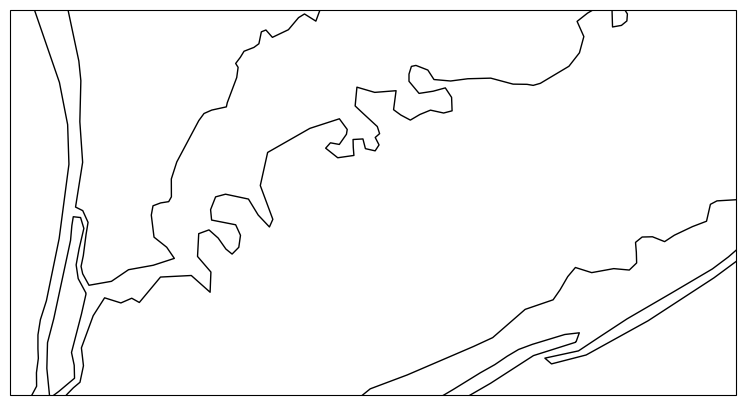

In [188]:
#zoomed in view of the study are
center_lat= 37.5
center_lon= -96
extent = [-73, -74, 40.7, 40.95]   

plt.figure(figsize=(10, 5))  
ax = plt.axes(projection = ccrs.AlbersEqualArea(center_lon, center_lat))
ax.set_extent(extent)
ax.coastlines()
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.STATES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.BORDERS)
plt.scatter(x=df.LONG_DD, y=df.LAT_DD, transform = ccrs.PlateCarree())  
plt.title("STATIONS In Long Island Sound Embayments")

## Exploring potential correlations among the data

In [189]:
#are there correlations present between variables in the original dataframe?
df_CORR = df[['DO', 'CHLA_UG_L', 'TEMPERATURE_C', 'PH', 'DEPTH_M', 'PREV_48_H_RAIN', 'SALINITY_PSU']].corr()
df_CORR
#from this it looks like DO is most correlated with temperature, salinity, and chla (top 3)

,DO,CHLA_UG_L,TEMPERATURE_C,PH,DEPTH_M,PREV_48_H_RAIN,SALINITY_PSU
DO,1.000000,-0.112901,-0.863674,0.115157,-0.122348,-0.011384,-0.224675
CHLA_UG_L,-0.112901,1.000000,0.233971,0.197780,0.263836,0.056752,0.276453
TEMPERATURE_C,-0.863674,0.233971,1.000000,-0.012321,0.156928,0.008159,0.229245
PH,0.115157,0.197780,-0.012321,1.000000,0.152860,0.131898,-0.132612
DEPTH_M,-0.122348,0.263836,0.156928,0.152860,1.000000,-0.029333,0.185838
PREV_48_H_RAIN,-0.011384,0.056752,0.008159,0.131898,-0.029333,1.000000,-0.260573
SALINITY_PSU,-0.224675,0.276453,0.229245,-0.132612,0.185838,-0.260573,1.000000


In [190]:
#how do the correlations change when we isolate dates where nutrients were also measured?
df_CORR = df_NUTR[['DO', 'CHLA_UG_L', 'TEMPERATURE_C', 'PH', 'DEPTH_M', 'PREV_48_H_RAIN', 'SALINITY_PSU', 'AMMONIA-AMMONIUM_MG_L', 'NITRITE_NITRATE_MG_L', 'PARTICULATE_N_MG_L', 'ORTHOPHOSPHATE_MG_L', 'TOTAL_DISSOLVED_ N_MG_L', 'TOTAL_DISSOLVED_P_MG_L', 'PARTICULATE_P_MG_L', 'DISSOLVED_SILICA_MG_L', 'BIOGENIC_SILICA_MG_L']].corr()
df_CORR
#DO is now most correlated to chla, temperature, orthophosphate, and dissolved silica (top 4)

,DO,CHLA_UG_L,TEMPERATURE_C,PH,DEPTH_M,PREV_48_H_RAIN,SALINITY_PSU,AMMONIA-AMMONIUM_MG_L,NITRITE_NITRATE_MG_L,PARTICULATE_N_MG_L,ORTHOPHOSPHATE_MG_L,TOTAL_DISSOLVED_ N_MG_L,TOTAL_DISSOLVED_P_MG_L,PARTICULATE_P_MG_L,DISSOLVED_SILICA_MG_L,BIOGENIC_SILICA_MG_L
DO,1.000000,-0.232834,-0.894741,-0.043542,-0.013382,-0.111447,-0.083880,0.114414,-0.182385,0.138703,-0.500119,-0.228676,0.019516,-0.124664,-0.446662,-0.119855
CHLA_UG_L,-0.232834,1.000000,0.346956,0.153892,-0.043838,0.067066,-0.253487,-0.102827,-0.067066,0.433437,0.325085,0.101561,-0.065476,0.121280,0.266272,0.005670
TEMPERATURE_C,-0.894741,0.346956,1.000000,0.127882,0.012150,0.084715,0.091837,-0.209217,0.108135,-0.001553,0.417116,0.196255,-0.124438,0.035225,0.515457,0.036632
PH,-0.043542,0.153892,0.127882,1.000000,0.099117,0.195776,-0.339124,-0.696400,0.298892,0.160218,-0.268850,0.732875,-0.771866,-0.778011,0.574854,-0.814339
DEPTH_M,-0.013382,-0.043838,0.012150,0.099117,1.000000,-0.028517,0.030327,-0.079708,0.080540,-0.034098,-0.041709,0.073287,-0.089890,-0.111177,0.066056,-0.084960
PREV_48_H_RAIN,-0.111447,0.067066,0.084715,0.195776,-0.028517,1.000000,-0.036273,-0.199750,-0.098045,0.074790,-0.102237,0.082924,-0.203564,-0.171232,0.088863,-0.229882
SALINITY_PSU,-0.083880,-0.253487,0.091837,-0.339124,0.030327,-0.036273,1.000000,0.288794,-0.329822,-0.134860,-0.196442,-0.442758,0.224446,0.362025,-0.325226,0.499785
AMMONIA-AMMONIUM_MG_L,0.114414,-0.102827,-0.209217,-0.696400,-0.079708,-0.199750,0.288794,1.000000,-0.185910,0.054889,0.244915,-0.580693,0.761405,0.713322,-0.462634,0.744959
NITRITE_NITRATE_MG_L,-0.182385,-0.067066,0.108135,0.298892,0.080540,-0.098045,-0.329822,-0.185910,1.000000,0.012255,0.188324,0.657897,-0.070820,-0.218516,0.387991,-0.199905
PARTICULATE_N_MG_L,0.138703,0.433437,-0.001553,0.160218,-0.034098,0.074790,-0.134860,0.054889,0.012255,1.000000,-0.172619,0.093987,0.220881,0.087090,0.169860,0.009704


ValueError: not enough values to unpack (expected 4, got 2)

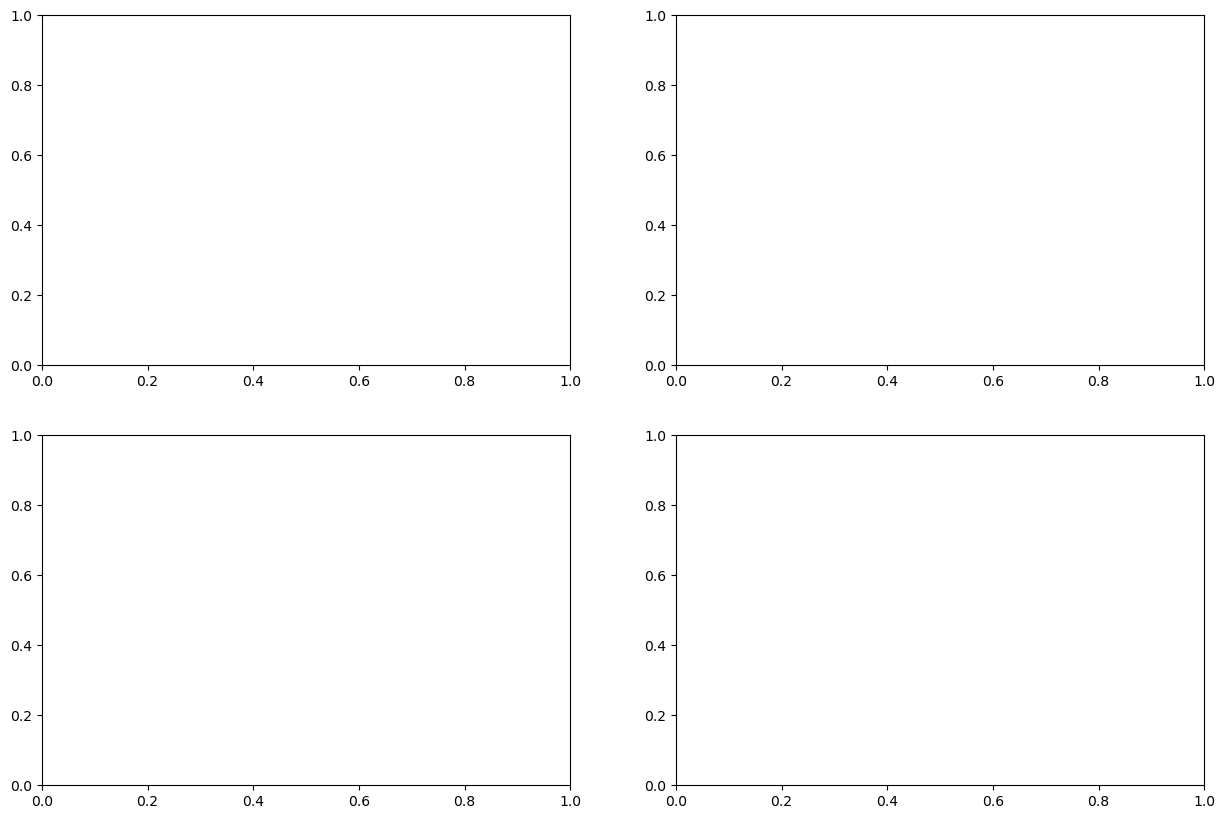

In [191]:
#visualize the correlation between temperature and dissolved oxygen
fig, (ax0, ax1, ax2, ax3) = plt.subplots(figsize = (15,10), ncols=2, nrows = 2)

ax0 = plt.scatter(df['TEMPERATURE_C'], df['DO'])
ax0.set_xlabel('x')
ax0.set_ylabel('y')
ax0.set_title('x vs. y')


ax0 = plt.xlabel ('TEMPERATURE_C')
ax0 = plt.ylabel ('DO mg/L')
ax0 = plt.title('DO vs TEMP')
ax1 = plt.scatter(df['DISSOLVED_SILICA_MG_L'], df['DO'])
plt.xlabel ('Dissolved Silica (mg/L)')
plt.ylabel ('DO mg/L')
plt.title('DO vs Dissolved Silica')

ax2 = plt.scatter(df['CHLA_UG_L'], df['DO'])
plt.xlabel ('CHL-A (ug/L)')
plt.ylabel ('DO mg/L')
plt.title('DO vs CHL-A')

ax3 = plt.scatter(df_NUTR['ORTHOPHOSPHATE_MG_L'], df_NUTR['DO'])
plt.xlabel ('OPO4 (ug/L)')
plt.ylabel ('DO mg/L')
plt.title('DO vs OPO4')



In [ ]:
ax = plt.scatter(df['DISSOLVED_SILICA_MG_L'], df['DO'])
plt.xlabel ('Dissolved Silica (mg/L)')
plt.ylabel ('DO mg/L')
plt.title('DO vs Dissolved Silica')

In [ ]:
ax = plt.scatter(df['CHLA_UG_L'], df['DO'])
plt.xlabel ('CHL-A (ug/L)')
plt.ylabel ('DO mg/L')
plt.title('DO vs CHL-A')

Text(0.5, 1.0, 'DO vs OPO4')

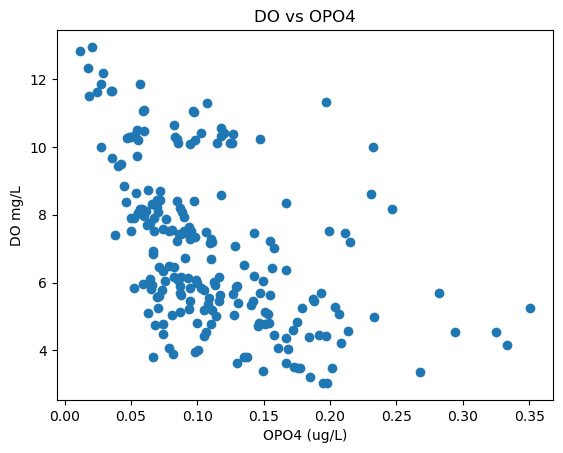

In [192]:
ax0 = plt.scatter(df_NUTR['ORTHOPHOSPHATE_MG_L'], df_NUTR['DO'])
plt.xlabel ('OPO4 (ug/L)')
plt.ylabel ('DO mg/L')
plt.title('DO vs OPO4')

## Explore how dissolved oxygen and correlated variables change over time, between stations, and between depths

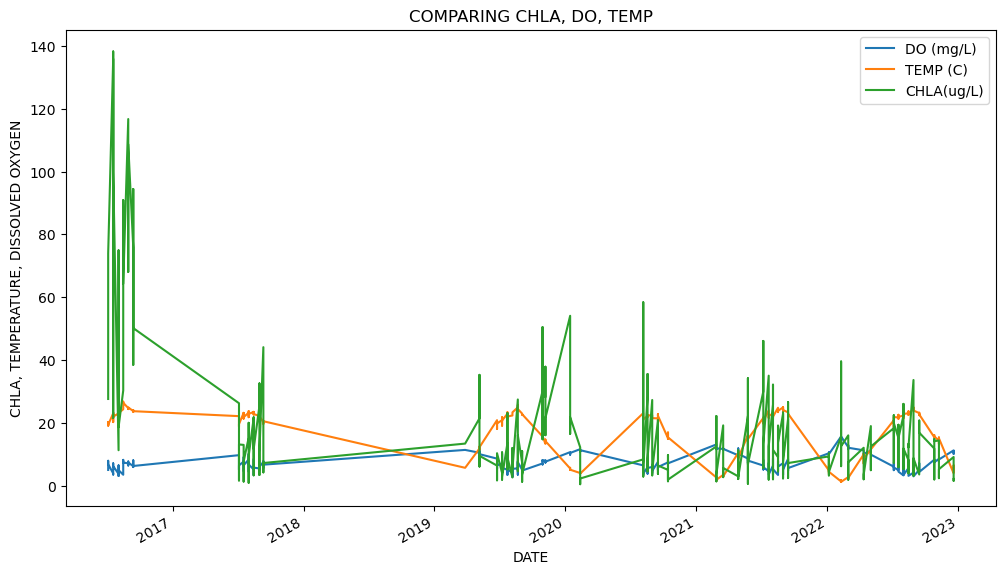

In [193]:
# compare chlorophyll-a, dissolvex oxygen, and temperature over the study period in a timeseries
fig, ax = plt.subplots(figsize = (12, 7))

ax.set_ylabel('CHLA, TEMPERATURE, DISSOLVED OXYGEN')
ax.set_title('COMPARING CHLA, DO, TEMP')

timeseries_DO = df.DO.plot()
timeseries_T = df.TEMPERATURE_C.plot()
timeseries = df.CHLA_UG_L.plot()

ax.legend(['DO (mg/L)', 'TEMP (C)', 'CHLA(ug/L)']) 


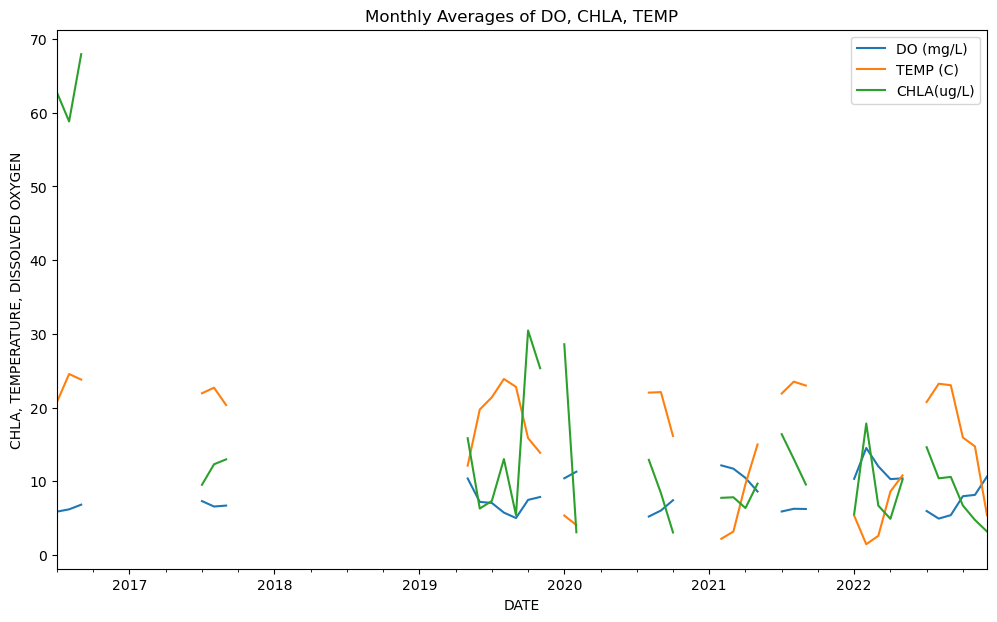

In [194]:
#view monthly averages of chlorophyll-a, temperature, and dissolved oxygen by resampling by month
fig, ax = plt.subplots(figsize = (12, 7))

ax.set_ylabel('CHLA, TEMPERATURE, DISSOLVED OXYGEN')
ax.set_title('Monthly Averages of DO, CHLA, TEMP')

monthly_AVG_DO = df.DO.resample('M').mean().plot()
monthly_AVG_CHLA_UG_L = df.TEMPERATURE_C.resample('M').mean().plot()
monthly_AVG_CHLA_UG_L = df.CHLA_UG_L.resample('M').mean().plot()

ax.legend(['DO (mg/L)', 'TEMP (C)', 'CHLA(ug/L)']) 

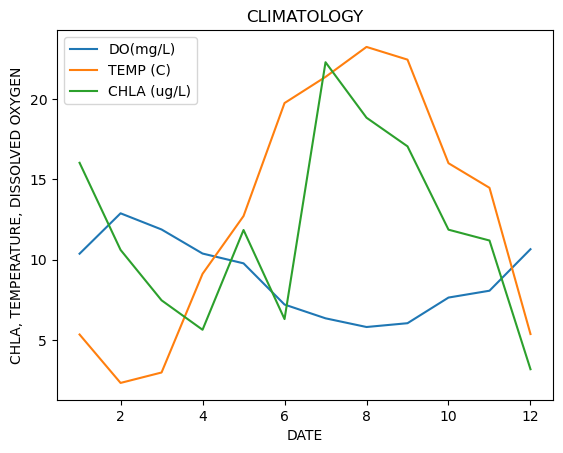

In [195]:
#get climatology by using groupby index method
#results show the lowest oxygen is in August, when temperature and chl-a is the highest
monthly_climatology = df.groupby(df.index.month).mean(numeric_only=True)

fig, ax = plt.subplots()

ax.set_ylabel('CHLA, TEMPERATURE, DISSOLVED OXYGEN')
ax.set_title('CLIMATOLOGY')

monthly_climatology.DO.plot()
monthly_climatology.TEMPERATURE_C.plot()
monthly_climatology.CHLA_UG_L.plot()

ax.legend(['DO(mg/L)', 'TEMP (C)', 'CHLA (ug/L)']) 

In [196]:
df.STATION_ID

DATE
2016-07-05         A2M
2016-07-05         E12
2016-07-05        H-A3
2016-07-05         B1S
2016-07-05         B3M
                ...   
2022-12-20         B3M
2022-12-20         H-D
2022-12-20          A5
2022-12-20          A4
2022-12-20    Dup E-12
Name: STATION_ID, Length: 538, dtype: object

In [197]:
#which stations have the lowest DO and highest DO overall?
#first groupy by STATION_ID
grouped = df_copy_of_original.groupby('STATION_ID')

Text(0, 0.5, 'Dissolved_Oxygen_mg/L')

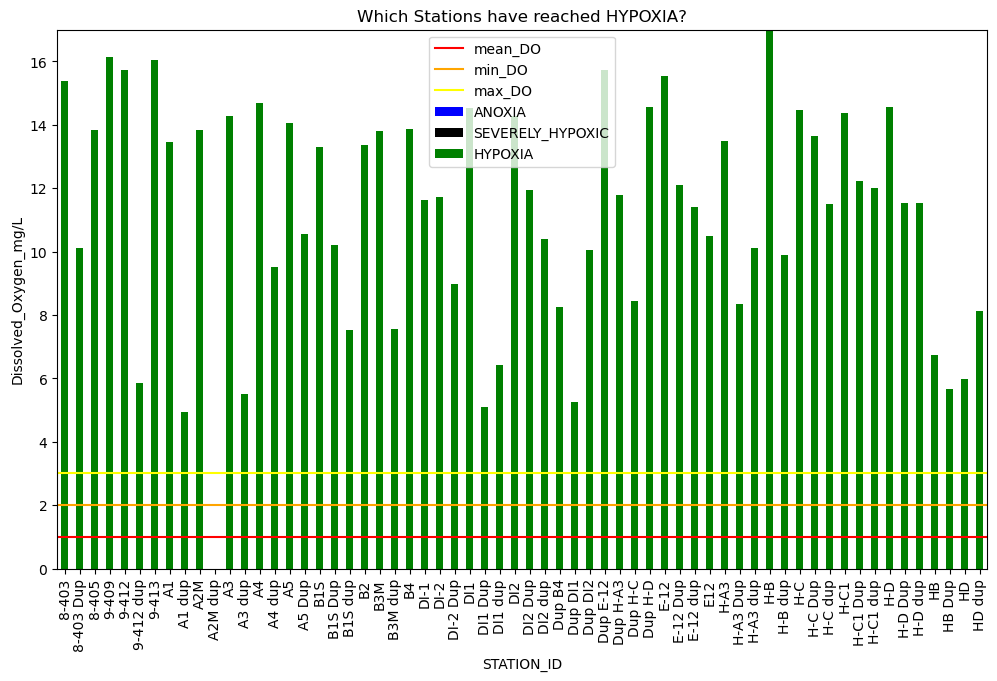

In [207]:
#HOW DO I SHOW EACH STATION????
fig, ax = plt.subplots(figsize = (12, 7))

mean_DO = grouped.DO.mean().plot(color = 'blue', kind = 'bar', stacked = True)
min_DO = grouped.DO.min().plot(color = 'BLACK', kind = 'bar', stacked = True)
max_DO = grouped.DO.max().plot(color = 'green', kind = 'bar', stacked = True)
ANOXIA = plt.axhline(y = 1, color = 'RED', linestyle = '-') 
SEVERELY_HYPOXIC = plt.axhline(y = 2, color = 'ORANGE', linestyle = '-') 
HYPOXIA = plt.axhline(y = 3, color = 'YELLOW', linestyle = '-') 
plt.axis(ymin= 0, ymax = 17)

ax.legend(['mean_DO', 'min_DO', 'max_DO', 'ANOXIA', 'SEVERELY_HYPOXIC', 'HYPOXIA'])
ax.set_title('Which Stations have reached HYPOXIA?')
ax.set_ylabel('Dissolved_Oxygen_mg/L')

In [ ]:
#how often did the station reach 

In [728]:
low_DO = grouped.DO.mean().nsmallest(5)
low_DO

STATION_ID
Dup H-D      4.575
Dup DI2      5.190
E-12 Dup     5.330
9-412 dup    5.440
DI2 dup      5.655
Name: DO, dtype: float64

In [ ]:
df.groupby('CLASS')

In [732]:
gb = grouped.groups

In [733]:
gb.keys()

dict_keys(['8-403', '8-403 Dup', '9-412', '9-412 dup', 'A2M', 'A4', 'A5', 'B1S', 'B1S Dup', 'B3M', 'B3M dup', 'DI2', 'DI2 Dup', 'DI2 dup', 'Dup DI2', 'Dup E-12', 'Dup H-D', 'E-12', 'E-12 Dup', 'E-12 dup', 'E12', 'H-A3', 'H-A3 dup', 'H-D', 'HB Dup', 'HD dup'])

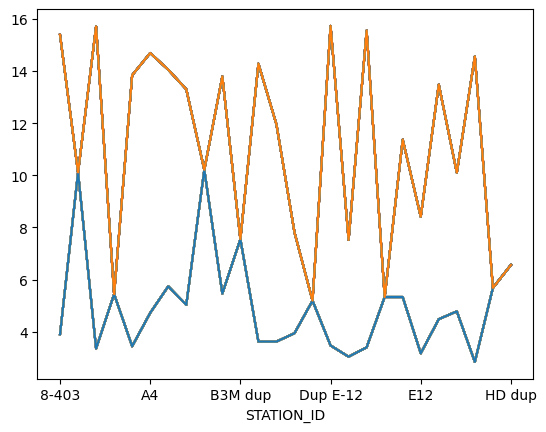

In [758]:
for key, group in grouped:
    grouped.DO.min().plot()
    grouped.DO.max().plot()



In [ ]:
# to check which depth class (surface, middle, or bottom)  has the greatets and lowest Dissolved Oxyen
#first, groupby class
classified = df.groupby('CLASS')

In [ ]:
bottom=classified.get_group('Bottom')

In [ ]:
middle= classified.get_group('Middle')

In [ ]:

surface = classified.get_group('Surface')

In [ ]:
bottom.DO.mean()

In [ ]:
middle.DO.mean()

In [ ]:
surface.DO.mean()

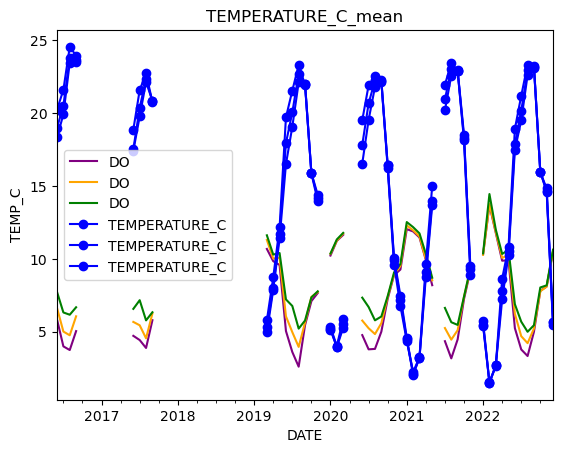

In [50]:
ax1 = bottom.DO.resample('M').mean().plot(c = 'Purple', ylabel= 'DO_mg_L')
ax2 = middle.DO.resample('M').mean().plot(c = 'Orange', title = 'Monthly_DO_mean')
ax3 = surface.DO.resample('M').mean().plot(c = 'Green')
ax4 = bottom.TEMPERATURE_C.resample('M').mean().plot(c = 'BLUE', ylabel= 'TEMP_C', marker = 'o')
ax5 = middle.TEMPERATURE_C.resample('M').mean().plot(c = 'BLUE', title = 'TEMPERATURE_C_mean', marker = 'o')
ax6 = surface.TEMPERATURE_C.resample('M').mean().plot(c = 'BLUE', marker = 'o')
ax1.legend()

In [45]:
#the mean monthly average for Dissolved oxygen is higher at the surface, lower at the middle, and lowest at the bottom

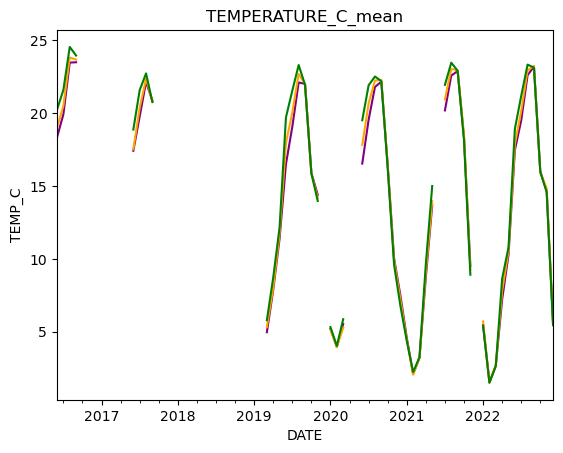

In [51]:
ax1 = bottom.TEMPERATURE_C.resample('M').mean().plot(c = 'Purple', ylabel= 'TEMP_C')
ax2 = middle.TEMPERATURE_C.resample('M').mean().plot(c = 'Orange', title = 'TEMPERATURE_C_mean')
ax3 = surface.TEMPERATURE_C.resample('M').mean().plot(c = 'Green')

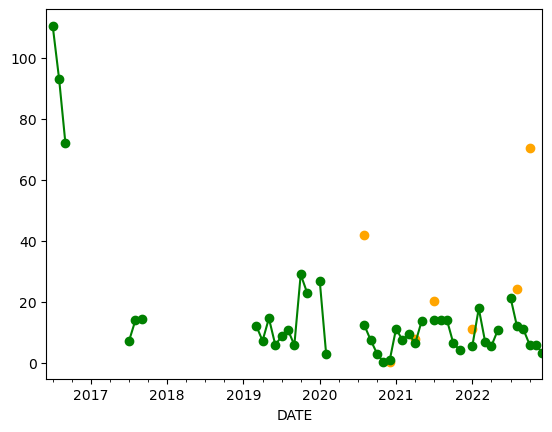

In [52]:
ax1 = bottom.CHLA_UG_L.resample('M').mean().plot(c = 'Purple', marker = 'o')
ax2 = middle.CHLA_UG_L.resample('M').mean().plot(c = 'Orange', marker = 'o')
ax3 = surface.CHLA_UG_L.resample('M').mean().plot(c = 'Green', marker = 'o')

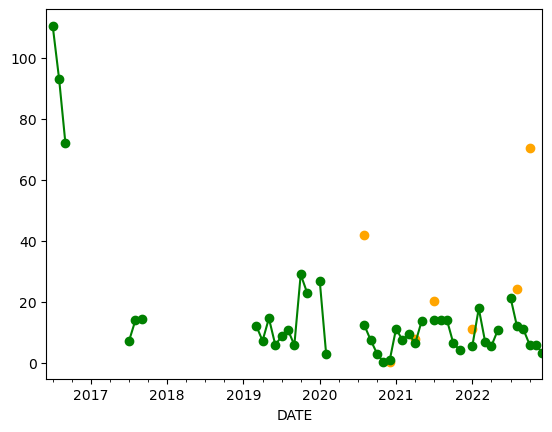

In [56]:
ax2 = middle.CHLA_UG_L.resample('M').mean().plot(c = 'Orange', marker = 'o')
ax3 = surface.CHLA_UG_L.resample('M').mean().plot(c = 'Green', marker = 'o')

## CHLA vs DO

In [ ]:
Sources:
https://careerfoundry.com/en/blog/data-analytics/how-to-find-outliers/


## Build a Model to Predict DO

In [301]:
#Will use statsmodel to predict DO using df_NUTR
df_NUTR = df_NUTR.reset_index()

In [302]:
#split data into two part, to train the model and to test the model
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_NUTR, test_size=0.2)

In [303]:
test

,DATE,RECORD_ID,DATE_STATION_LINK,YEAR,MONTH,TIME_24H,DEPTH_M,CLASS,DO,TEMPERATURE_C,...,PREV_24_H_RAIN,PREV_48_H_RAIN,TIDE_TIME_NR,TIDE_RANGE_FT_NR,TIDE_TYPE_NR,TIDE_TIME_KP,TIDE_RANGE_FT_KP,TIDE_TYPE_KP,LAT_DD,LONG_DD
60,2020-11-25,8-403_11/25/2020_7:10_0.5,11/25/2020_8-403,2020.0,November,7:10,0.5,Surface,9.10,8.644,...,0.0,0.18,7:57,7.6,High,8:13,7.53,High,40.77791,-73.76083
257,2022-12-20,E-12_12/20/2022_11:31_0.5,12/20/2022_E-12,2022.0,December,11:31,0.5,Surface,11.09,4.512,...,< 1 ft,NaN,"Clear skies, windy, 33°F air temp, 15 mph wind",0,0,7:34,8.07,High,40.84856,-73.80428
69,2020-12-11,9-412_12/11/2020_6:48_0.5,12/11/2020_9-412,2020.0,December,6:48,0.5,Surface,10.40,4.560,...,0.0,0.02,7:34,8.49,High,7:50,8.41,High,40.82009,-73.71357
45,2020-09-16,A4_9/16/2020_9:14_7,9/16/2020_A4,2020.0,September,9:14,7.0,Surface,5.78,22.648,...,0.0,0.00,4:55,-0.27,LOW,5:13,-0.29,LOW,40.87259,-73.73428
232,2022-10-27,A2M_10/27/2022_11:09_0.5,10/27/2022_A2M,2022.0,October,11:09,0.5,Surface,7.52,16.132,...,1 ft,NaN,"Windy, clear skies, 60°F air temp, 20-26 mph wind",0,0.01,6:30,-0.02,Low,40.79926,-73.79131
167,2022-03-01,DI2_3/1/2022_8:59_0.5,3/1/2022_DI2,2022.0,March,8:59,0.5,Surface,11.65,2.550,...,0.00,0.00,10:09,8.38,High,10:25,8.30,High,40.89306,-73.76405
0,2020-08-06,9-412_8/6/2020_5:54_0.6,8/6/20_9-412,2020.0,August,5:54,0.6,Surface,6.53,23.150,...,0.0,0.27,8:34,0.48,Low,8:52,0.51,Low,40.82009,-73.71357
131,2021-08-17,H-A3_8/17/2021_7:43_0.5,08/17/2021_H-A3,2021.0,August,7:43,0.5,Surface,7.53,23.941,...,0.0,0.00,6:51,6.98,High,7:07,6.92,High,40.92084,-73.71825
186,2022-07-19,E-12_7/19/2022_8:27_0.5,7/19/2022_E-12,2022.0,July,8:27,0.5,Surface,4.50,23.109,...,"Partly cloudy, windy, 79°F air temp, 8-15 mph ...",0.10,0.34,4:30,7.68,High,4:23,8.08,40.84856,-73.80428
117,2021-07-22,8-403_7/22/2021_6:06_0.8,7/22/2021_8-403,2021.0,July,6:06,0.8,Surface,5.07,23.768,...,0.16,0.16,4:45,-0.48,Low,5:03,-0.51,Low,40.77791,-73.76083


In [304]:
#make X and Y Matrix
Y,X = dmatrices ('DO~ CHLA_UG_L + TEMPERATURE_C + ORTHOPHOSPHATE_MG_L ', data=train, return_type='dataframe')

In [305]:
mod = sm.OLS(Y, X)

#update matrix so it has constant added to it
X= sm.add_constant(X) 

In [306]:
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DO   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     389.1
Date:                Sun, 03 Dec 2023   Prob (F-statistic):           2.43e-84
Time:                        16:57:12   Log-Likelihood:                -290.19
No. Observations:                 209   AIC:                             588.4
Df Residuals:                     205   BIC:                             601.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              12.8465      0.181     71.029      0.000      12.490      13.203
CHLA_UG_L               0.0333      0.009      3.824      0.000       0.016       0.051
TEMPERATURE_C          -0.3265      0.011    -30.667      0.000      -0.348      -0.306
ORTHOPHOSPHATE_MG_L    -2.7685      0.932     -2.972      0.003      -4.605      -0.932
==============================================================================
Omnibus:                        1.293   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.524   Jarque-Bera (JB):                0.950
Skew:                           0.112   Prob(JB):                        0.622
Kurtosis:                       3.242   Cond. No.                         294.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [307]:
#test the model with the test data
Y_test,X_test = dmatrices ('DO~ CHLA_UG_L + TEMPERATURE_C + ORTHOPHOSPHATE_MG_L ', data=test, return_type='dataframe')
y_pred = res.predict(exog = X_test)

In [308]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54 entries, 60 to 93
Data columns (total 39 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   DATE                     54 non-null     datetime64[ns]
 1   RECORD_ID                54 non-null     object        
 2   DATE_STATION_LINK        54 non-null     object        
 3   YEAR                     54 non-null     float64       
 4   MONTH                    54 non-null     object        
 5   TIME_24H                 54 non-null     object        
 6   DEPTH_M                  54 non-null     float64       
 7   CLASS                    54 non-null     object        
 8   DO                       54 non-null     float64       
 9   TEMPERATURE_C            54 non-null     float64       
 10  SALINITY_PSU             54 non-null     float64       
 11  CHLA_UG_L                54 non-null     float64       
 12  PH                       50 non-null     f

In [309]:
y_pred

60      9.725077
257    11.283218
69     11.014785
45      5.352375
232     7.510098
167    12.025529
0       5.195131
131     5.110893
186     4.749074
117     5.714881
94     12.162505
212     3.290561
255    11.349665
223     5.368410
75     10.903503
195     5.313502
103     8.372527
237     7.555691
159    10.676263
140     4.679330
170    10.230476
250     8.091505
43      6.094484
90     11.540771
36      5.965490
55      7.813206
133     4.893587
236     7.540728
124     5.630131
14      5.375012
169     9.512912
42      5.457296
37      5.175853
214     4.348003
225     5.246150
229     5.441237
172     9.984726
258    10.846184
162    11.181523
136     5.050426
135     4.860790
213     4.291423
188     5.561380
105     7.675856
163    12.416282
24      5.995760
35      6.271591
208     5.299503
52      7.319199
175    10.103006
261    10.827900
149     5.587073
110     6.589436
93     12.291579
dtype: float64

In [310]:
#add predicted dissolved oxygen values as a new column to test dataframe
test['DO_Predicted'] = y_pred

In [311]:
#compare the true values to the predicted values
test[['DO', 'DO_Predicted']]

,DO,DO_Predicted
60,9.10,9.725077
257,11.09,11.283218
69,10.40,11.014785
45,5.78,5.352375
232,7.52,7.510098
167,11.65,12.025529
0,6.53,5.195131
131,7.53,5.110893
186,4.50,4.749074
117,5.07,5.714881


Text(0.5, 1.0, 'CLIMATOLOGY')

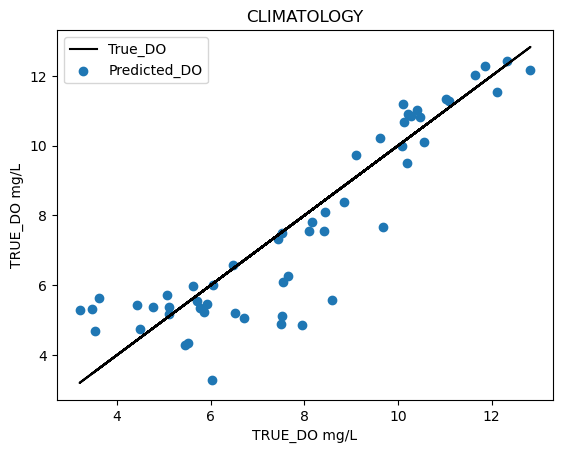

In [320]:
#compare the true DO values to the Predicted DO values visually
fig, ax = plt.subplots()
ax.plot(test['DO'],test['DO'], color = 'BLACK')
ax.scatter(test['DO'], test['DO_Predicted'])
ax.legend(['True_DO', 'Predicted_DO'])
ax.set_xlabel('TRUE_DO mg/L')
ax.set_ylabel('TRUE_DO mg/L')
ax.set_title('CLIMATOLOGY')

In [86]:
data = {'site': ['floyd', 'van' , 'corportate','floyd', 'van' , 'corportate'],
        'TENS_15': [1.00, 2.00, 3.00, 2.00, 3.00, 4.00],
        'TENS_10': [2.00, 10.00, 4.00, 5.00, 4.00, 5.00]}

df = pd.DataFrame(data, index=['0', '1', '2', '3', '4', '5'])


In [87]:
df

,site,TENS_15,TENS_10
0,floyd,1.0,2.0
1,van,2.0,10.0
2,corportate,3.0,4.0
3,floyd,2.0,5.0
4,van,3.0,4.0
5,corportate,4.0,5.0


In [88]:
grouped = df.groupby('site')

In [89]:
grouped.TENS_15.mean().nlargest(2)

site
corportate    3.5
van           2.5
Name: TENS_15, dtype: float64

In [90]:
grouped.TENS_10.mean().nlargest(2)

site
van           7.0
corportate    4.5
Name: TENS_10, dtype: float64

In [73]:
df['mean_tens_10'] = df.groupby('site').TENS_15.mean()
df['mean_tens_15'] = df.groupby('site').TENS_10.mean()

ax = df.plot(x="site", y=df["mean_tens_10", "mean_tens_15"], kind="bar", rot=0, stacked=True)


KeyError: ('mean_tens_10', 'mean_tens_15')

In [74]:
df

,site,TENS_15,TENS_10,mean_tens_10,mean_tens_15
0,floyd,1.0,2.0,NaN,NaN
1,van,2.0,3.0,NaN,NaN
2,corportate,3.0,4.0,NaN,NaN
3,floyd,2.0,3.0,NaN,NaN
4,van,3.0,4.0,NaN,NaN
5,corportate,4.0,5.0,NaN,NaN


<Axes: xlabel='site'>

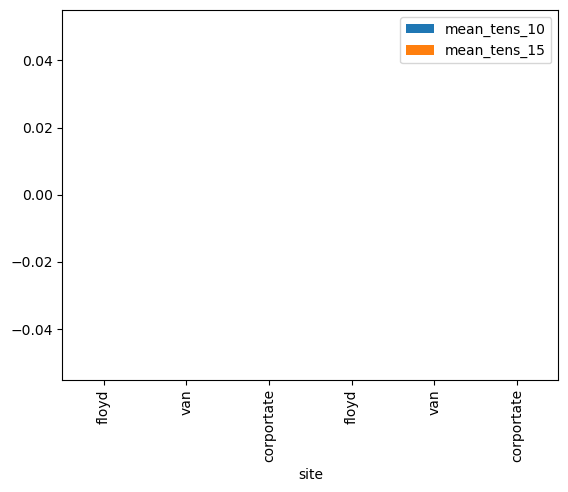

In [75]:
df.plot(x="site", y=["mean_tens_10", "mean_tens_15"], kind="bar") 

In [76]:
mean_tens_10

NameError: name 'mean_tens_10' is not defined

In [77]:
grouped = df.groupby(['site', 'TENS_15', 'TENS_10'])

In [78]:
grouped.mean().nlargest(2).TENS_15', 'TENS_10'].plot(kind = 'bar')

SyntaxError: invalid syntax (1028673303.py, line 1)

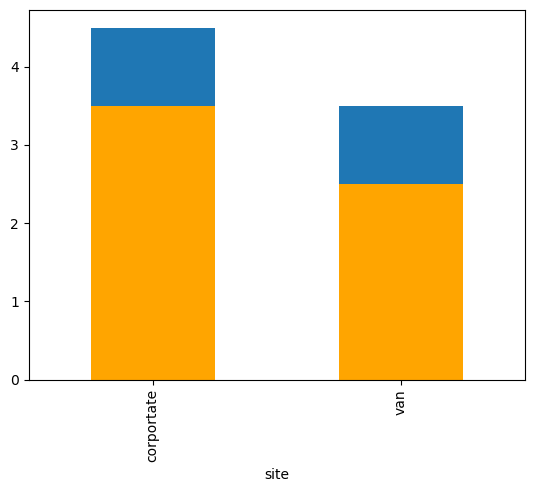

In [81]:
fig, ax = plt.subplots()
ax0 = mean_tens_10 = df.groupby('site').TENS_10.mean().nlargest(2).plot(kind = 'bar')
ax1 = mean_tens_15 = df.groupby('site').TENS_15.mean().nlargest(2).plot(kind = 'bar', color = 'orange')

In [428]:
grouped.aggregate(np.mean).nlargest()['TENS_15'].plot(kind='bar')

/tmp/ipykernel_29409/2207545219.py:1: FutureWarning: The provided callable <function mean at 0x7fa9cc059f70> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grouped.aggregate(np.mean).nlargest()['TENS_15'].plot(kind='bar')


TypeError: nlargest() missing 2 required positional arguments: 'n' and 'columns'

<Axes: xlabel='site'>

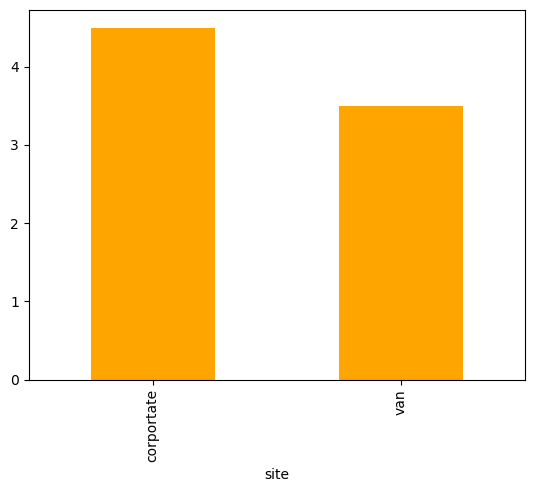

In [643]:
df.groupby('site').mean()['TENS_15'].nlargest(2).plot(kind = 'bar', color = 'blue')
df.groupby('site').mean()['TENS_10'].nlargest(2).plot(kind = 'bar', color = 'orange')

In [403]:
df.groupby(['site']).TENS_15.mean().nlargest(2).unstack().plot(kind = 'bar', stacked = True)

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

TypeError: unsupported operand type(s) for +: 'int' and 'Axes'

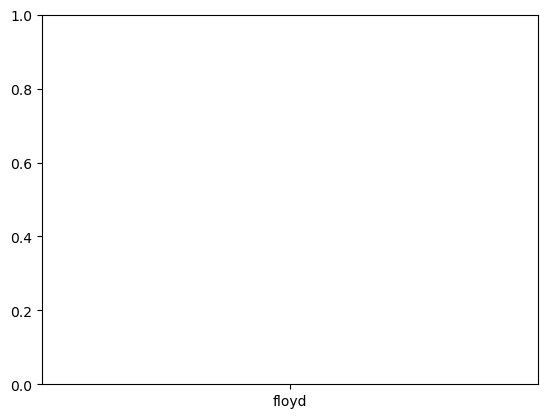

In [416]:
ax = plt.subplot()
ax.bar(df['site'], mean_tens_10)
ax.bar(df['site'], mean_tens15)


In [ ]:
### Sources

### Versions+